In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"E:\elevatetrsest\dataset\price_wheat_daily.csv")

In [3]:
df.head()

date  district_id district_name commodity_name   state_name  \
0  2025-03-07          497     Nandurbar          Wheat  Maharashtra   
1  2025-03-06          497     Nandurbar          Wheat  Maharashtra   
2  2025-03-05          497     Nandurbar          Wheat  Maharashtra   
3  2025-03-04          497     Nandurbar          Wheat  Maharashtra   
4  2025-03-03          497     Nandurbar          Wheat  Maharashtra   

   avg_modal_price  avg_min_price  avg_max_price calculationType  change  
0           2673.0         2525.5        2716.00           Daily   100.5  
1           2572.5         2470.0        2710.50           Daily   -61.5  
2           2634.0         2500.0        2740.00           Daily   147.5  
3           2486.5         2390.5        2628.75           Daily  -238.5  
4           2725.0         2492.0        2778.00           Daily   -31.5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             30501 non-null  object 
 1   district_id      30501 non-null  int64  
 2   district_name    30501 non-null  object 
 3   commodity_name   30501 non-null  object 
 4   state_name       30501 non-null  object 
 5   avg_modal_price  30501 non-null  float64
 6   avg_min_price    30501 non-null  float64
 7   avg_max_price    30501 non-null  float64
 8   calculationType  30501 non-null  object 
 9   change           30470 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [5]:

df['date_n'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

df.drop('date', axis=1, inplace=True)
df['date'] = df['date_n']
df.drop('date_n', axis=1, inplace=True)

In [6]:
 df.fillna('interpolate' , inplace=True)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_32036\2572123431.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'interpolate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('interpolate' , inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district_id      30501 non-null  int64  
 1   district_name    30501 non-null  object 
 2   commodity_name   30501 non-null  object 
 3   state_name       30501 non-null  object 
 4   avg_modal_price  30501 non-null  float64
 5   avg_min_price    30501 non-null  float64
 6   avg_max_price    30501 non-null  float64
 7   calculationType  30501 non-null  object 
 8   change           30501 non-null  object 
 9   month            30501 non-null  int32  
 10  year             30501 non-null  int32  
 11  date             30501 non-null  int32  
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 2.4+ MB


In [8]:
columns = ['district_name' , 'commodity_name' , 'state_name']

for col in columns:
    frequency_encoding = df[col].value_counts()
    df[f'{col}_enc'] = df[col].map(frequency_encoding)

df.drop(columns=columns , axis=1 , inplace=True)
df.drop(columns=['calculationType' , 'district_id' , 'change'] , axis=1 , inplace=True)

In [9]:
df.head()

avg_modal_price  avg_min_price  avg_max_price  month  year  date  \
0           2673.0         2525.5        2716.00      3  2025     7   
1           2572.5         2470.0        2710.50      3  2025     6   
2           2634.0         2500.0        2740.00      3  2025     5   
3           2486.5         2390.5        2628.75      3  2025     4   
4           2725.0         2492.0        2778.00      3  2025     3   

   district_name_enc  commodity_name_enc  state_name_enc  
0                981               30501           30501  
1                981               30501           30501  
2                981               30501           30501  
3                981               30501           30501  
4                981               30501           30501

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_modal_price     30501 non-null  float64
 1   avg_min_price       30501 non-null  float64
 2   avg_max_price       30501 non-null  float64
 3   month               30501 non-null  int32  
 4   year                30501 non-null  int32  
 5   date                30501 non-null  int32  
 6   district_name_enc   30501 non-null  int64  
 7   commodity_name_enc  30501 non-null  int64  
 8   state_name_enc      30501 non-null  int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 1.7 MB


In [11]:
import pandas as pd

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


df = remove_outliers_iqr(df)

df.head()

avg_modal_price  avg_min_price  avg_max_price  month  year  date  \
0           2673.0         2525.5        2716.00      3  2025     7   
1           2572.5         2470.0        2710.50      3  2025     6   
2           2634.0         2500.0        2740.00      3  2025     5   
3           2486.5         2390.5        2628.75      3  2025     4   
4           2725.0         2492.0        2778.00      3  2025     3   

   district_name_enc  commodity_name_enc  state_name_enc  
0                981               30501           30501  
1                981               30501           30501  
2                981               30501           30501  
3                981               30501           30501  
4                981               30501           30501

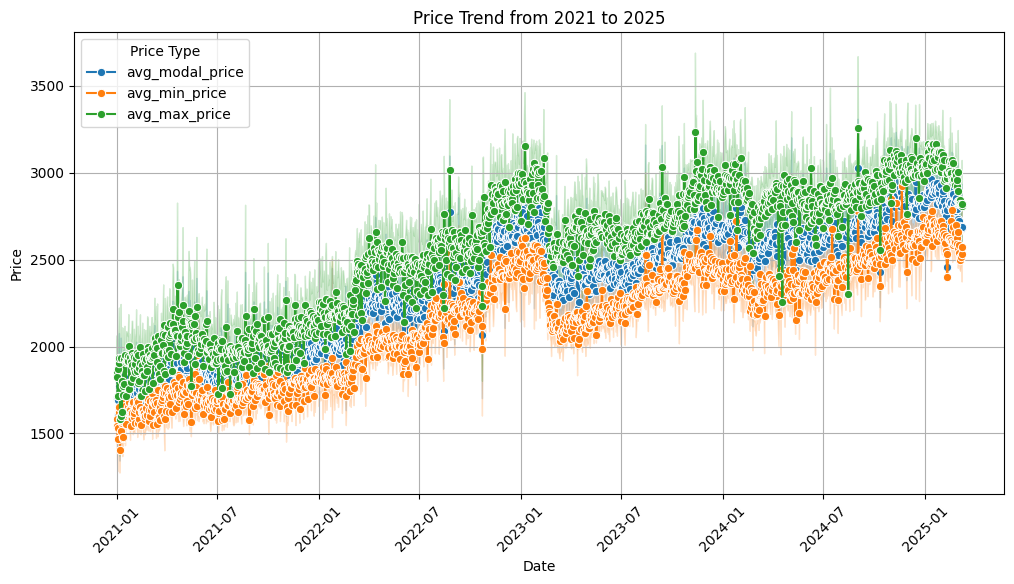

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined with columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Rename 'date' column to 'day' for compatibility with pd.to_datetime
df.rename(columns={'date': 'day'}, inplace=True)

# Create a datetime column using year, month, and day
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame for Seaborn, using 'datetime' as the id variable
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Plot the price trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')
plt.title("Price Trend from 2021 to 2025")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import plotly.express as px

# Assuming df is already defined with the appropriate columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Create a datetime column using year, month, and date
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame to long format for plotting
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Create an interactive line plot with Plotly Express
fig = px.line(df_melted, x='datetime', y='Price', color='Price Type', markers=True,
              title="Price Trend from 2021 to 2025")

fig.update_layout(xaxis_title="Date", yaxis_title="Price")
fig.show()


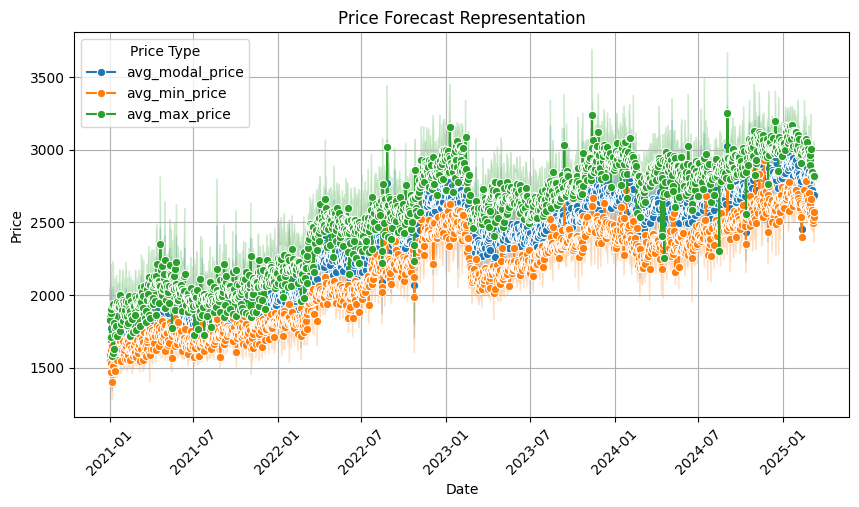

In [14]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt DataFrame for Seaborn
df_melted = df.melt(id_vars=['datetime'], value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                     var_name='Price Type', value_name='Price')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')

plt.title("Price Forecast Representation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()

In [15]:
import pandas as pd

# --- Safe Time-based Features ---
# Create datetime index (safe - no leakage)
df['date_parsed'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str),
    errors='coerce'
)

# Extract quarter from date (safe)
df['quarter'] = df['date_parsed'].dt.quarter

# Time trend (safe if created sequentially)
df = df.sort_values('date_parsed')
df['time_trend'] = range(len(df))

# --- Removed All Price-Based Features ---
# Removed: price_spread (uses target variables)
# Removed: modal_deviation (uses target variables)
# Removed: modal_price_lag1 (uses target variable)
# Removed: rolling_modal_mean (uses target variable)
# Removed: all district/commodity aggregates (use target variable)

# --- Final Features That Are Safe ---
# Only keeping features that can be created from the input you'll provide:
# year, month, day, quarter, time_trend (from date)
# plus the categorical encodings:
# district_name_enc, commodity_name_enc, state_name_enc

# Final feature set that matches your prediction pipeline requirements
safe_features = [
    'year', 'month', 'day', 'quarter', 'time_trend',
    'district_name_enc', 'commodity_name_enc', 'state_name_enc'
]

print("Adjusted feature engineering complete. Safe features:")
print(safe_features)

Adjusted feature engineering complete. Safe features:
['year', 'month', 'day', 'quarter', 'time_trend', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']


### feature engineering

In [16]:
df.fillna(method='bfill')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_32036\2831856154.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



avg_modal_price  avg_min_price  avg_max_price  month  year  day  \
30500          2250.00        1950.00        2350.00      1  2021    1   
9411           1607.60        1534.00        1683.00      1  2021    1   
24427          1524.00        1398.75        1642.88      1  2021    1   
3894           1495.00        1495.00        1495.00      1  2021    1   
28007          1611.67        1466.67        1700.00      1  2021    1   
...                ...            ...            ...    ...   ...  ...   
24428          2700.00        2400.00        3000.00      3  2025    9   
16225          2650.00        2466.67        2900.00      3  2025    9   
29134          2525.00        2512.50        2537.50      3  2025    9   
17684          2900.00        2800.00        3000.00      3  2025    9   
2081           2605.00        2550.00        2711.00      3  2025    9   

       district_name_enc  commodity_name_enc  state_name_enc   datetime  \
30500               1367               30501           30501 2021-01-01   
9411                1493               30501           30501 2021-01-01   
24427               1234               30501           30501 2021-01-01   
3894                 877               30501           30501 2021-01-01   
28007               1186               30501           30501 2021-01-01   
...                  ...                 ...             ...        ...   
24428               1287               30501           30501 2025-03-09   
16225               1459               30501           30501 2025-03-09   
29134               1367               30501           30501 2025-03-09   
17684               1180               30501           30501 2025-03-09   
2081                 895               30501           30501 2025-03-09   

      date_parsed  quarter  time_trend  
30500  2021-01-01        1           0  
9411   2021-01-01        1           1  
24427  2021-01-01        1           2  
3894   2021-01-01        1           3  
28007  2021-01-01        1           4  
...           ...      ...         ...  
24428  2025-03-09        1       28958  
16225  2025-03-09        1       28959  
29134  2025-03-09        1       28960  
17684  2025-03-09        1       28961  
2081   2025-03-09        1       28962  

[28963 rows x 13 columns]

In [17]:
df.drop(columns='date_parsed' , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28963 entries, 30500 to 2081
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   avg_modal_price     28963 non-null  float64       
 1   avg_min_price       28963 non-null  float64       
 2   avg_max_price       28963 non-null  float64       
 3   month               28963 non-null  int32         
 4   year                28963 non-null  int32         
 5   day                 28963 non-null  int32         
 6   district_name_enc   28963 non-null  int64         
 7   commodity_name_enc  28963 non-null  int64         
 8   state_name_enc      28963 non-null  int64         
 9   datetime            28963 non-null  datetime64[ns]
 10  quarter             28963 non-null  int32         
 11  time_trend          28963 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(4)
memory usage: 2.4 MB


single target - avg_modal_price model

In [18]:
df = df.rename(columns={'date': 'day'})

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import train_test_split

# Feature Engineering
X = df[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df['avg_modal_price']  # Target variable

# # Temporal train-test split (80-20 split)
# split_date = df['date'].iloc[int(len(df)*0.8)]
# X_train = X[X['date'] <= split_date]
# X_test = X[X['date'] > split_date]

# y_train = y[X['date'] <= split_date]
# y_test = y[X['date'] > split_date]

X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)



# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=False)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(f"R2: {r2_score(y_test, predictions)}")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Feature Importance
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Example prediction function
def predict_price( month, year,date, district, commodity, state):
    input_data = pd.DataFrame({
        'month': [month],
        'year': [year],
        'day': [date],
        'district_name_enc': [district],
        'commodity_name_enc': [commodity],
        'state_name_enc': [state]
    })
    
    input_data = input_data.drop('date', axis=1)
    return model.predict(input_data)[0]

# Example usage:
# predicted_price = predict_price(15, 3, 2024, 30501, 30501, 981)
# print(f"Predicted Price: {predicted_price}")

R2: 0.84384845700697
MAE: 121.46954985408036
RMSE: 180.37295622677124

Feature Importance:
              feature  importance
1                year    0.780322
3   district_name_enc    0.158031
0               month    0.056069
2                 day    0.005578
4  commodity_name_enc    0.000000
5      state_name_enc    0.000000


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from datetime import datetime
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [21]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [22]:
from skopt.space import Real, Integer, Categorical

# Bayesian Optimization search space
search_spaces = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 0.5),
    'n_estimators': Integer(100, 1000)
}
# XGBoost model template
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=50,
    random_state=42
)
# Bayesian Optimizer
opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=50,  # Number of optimization steps
    cv=3,  # Use time series split in practice
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Fit with Bayesian Optimization
opt.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

# Best model
best_model = opt.best_estimator_

# Evaluation
predictions = best_model.predict(X_test)
print(f"Optimized MAE: {mean_absolute_error(y_test, predictions)}")
print(f"Optimized r2: {r2_score(y_test, predictions)}")
print(f"Optimized RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Show best parameters
print("\nBest Parameters:")
for param, value in opt.best_params_.items():
    print(f"{param}: {value}")

# Feature Importance (using optimized model)
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Enhanced Multi-Target Regression 

In [24]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import r2_score, make_scorer
import xgboost as xgb
from skopt import BayesSearchCV

# Ensure df['date'] is in datetime format if needed:
# df['date'] = pd.to_datetime(df['date'])

X = df[['month', 'year', 'day', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

search_space = {
    'estimator__learning_rate': (0.01, 0.3, 'log-uniform'),
    'estimator__max_depth': (3, 12),
    'estimator__subsample': (0.6, 1.0),
    'estimator__colsample_bytree': (0.6, 1.0),
    'estimator__gamma': (0, 0.5),
    'estimator__n_estimators': (100, 1000)
}

def multioutput_r2_score(y_true, y_pred):
    return np.mean([r2_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

custom_scorer = make_scorer(multioutput_r2_score, greater_is_better=True)

# Removed early_stopping_rounds
model = MultiOutputRegressor(
    xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        random_state=42
    )
)

opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=100,
    cv=TimeSeriesSplit(n_splits=3),
    scoring=custom_scorer,
    n_jobs=-1,
    verbose=2
)

opt.fit(X_train.values, y_train.values)

best_model = opt.best_estimator_
predictions = best_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, predictions):.2%}")

def add_temporal_features(df):
    df['day_of_year'] = df['datetime'].dt.dayofyear
    df['days_since_start'] = (df['datetime'] - df['datetime'].min()).dt.days
    df['price_ratio'] = df['avg_max_price'] / df['avg_min_price']
    return df

for lag in [1, 7, 30]:
    df[f'modal_price_lag_{lag}'] = df.groupby(
        ['district_name_enc', 'commodity_name_enc']
    )['avg_modal_price'].shift(lag)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

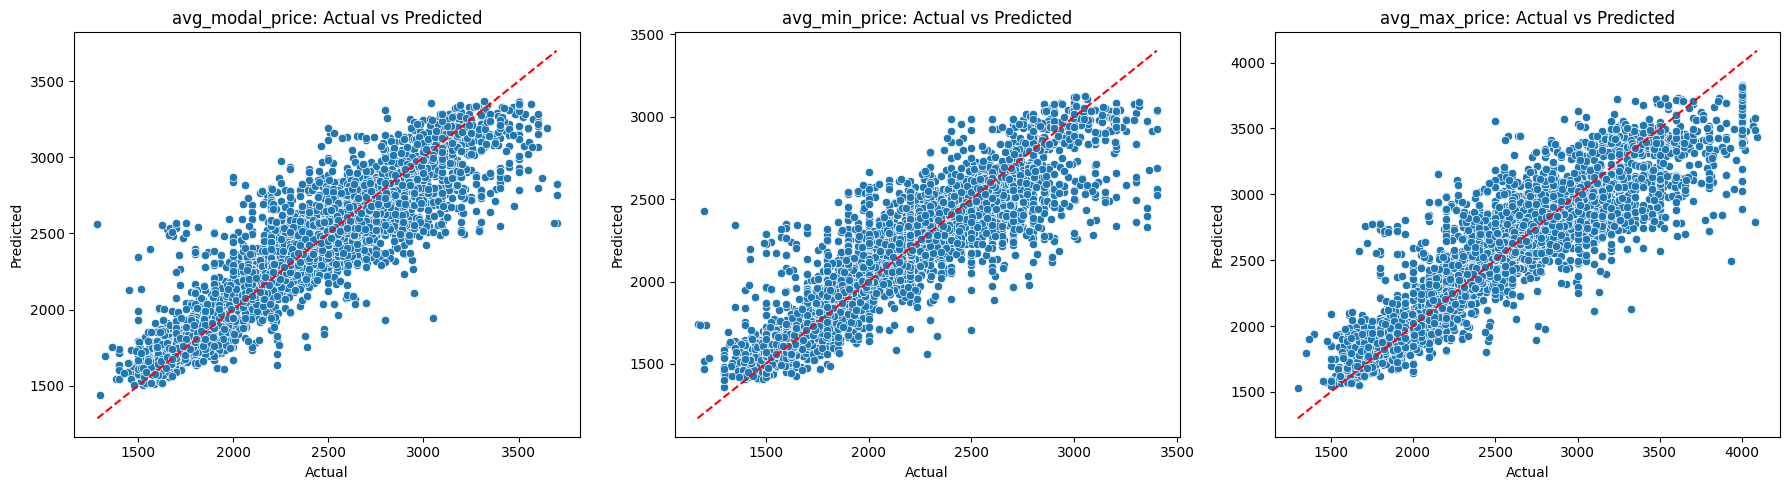

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions to a DataFrame for easier handling, matching columns in y_test
pred_df = pd.DataFrame(predictions, columns=['avg_modal_price', 'avg_min_price', 'avg_max_price'], index=y_test.index)

# Create subplots for each target variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

target_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']

for i, col in enumerate(target_cols):
    # Scatter plot for actual vs predicted
    sns.scatterplot(x=y_test[col], y=pred_df[col], ax=axes[i])
    # Plot the ideal prediction line
    min_val = min(y_test[col].min(), pred_df[col].min())
    max_val = max(y_test[col].max(), pred_df[col].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--')
    
    axes[i].set_title(f'{col}: Actual vs Predicted')
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")

plt.tight_layout()
plt.show()


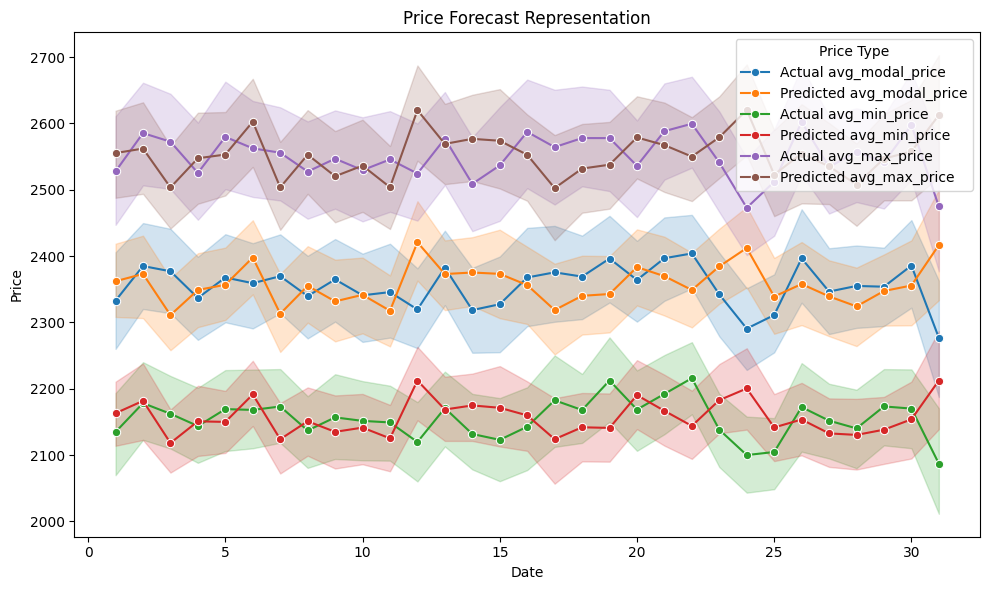

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your X_test has a 'date' column:
# 1. Sort by date (optional but often helpful)
X_test_sorted = X_test.sort_values(by='day')
y_test_sorted = y_test.loc[X_test_sorted.index]

# Convert predictions array into a DataFrame matching y_test columns
pred_df = pd.DataFrame(
    predictions, 
    columns=['avg_modal_price', 'avg_min_price', 'avg_max_price'], 
    index=X_test_sorted.index
)

# 2. Combine into one DataFrame for plotting
df_plot = X_test_sorted[['day']].copy()
df_plot['Actual avg_modal_price']   = y_test_sorted['avg_modal_price']
df_plot['Predicted avg_modal_price'] = pred_df['avg_modal_price']
df_plot['Actual avg_min_price']     = y_test_sorted['avg_min_price']
df_plot['Predicted avg_min_price']   = pred_df['avg_min_price']
df_plot['Actual avg_max_price']     = y_test_sorted['avg_max_price']
df_plot['Predicted avg_max_price']   = pred_df['avg_max_price']

# 3. Melt the DataFrame so we can plot by hue
df_melted = df_plot.melt(id_vars='day', var_name='Price_Type', value_name='Price')

# 4. Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='day', y='Price', hue='Price_Type', marker='o')
plt.title('Price Forecast Representation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()


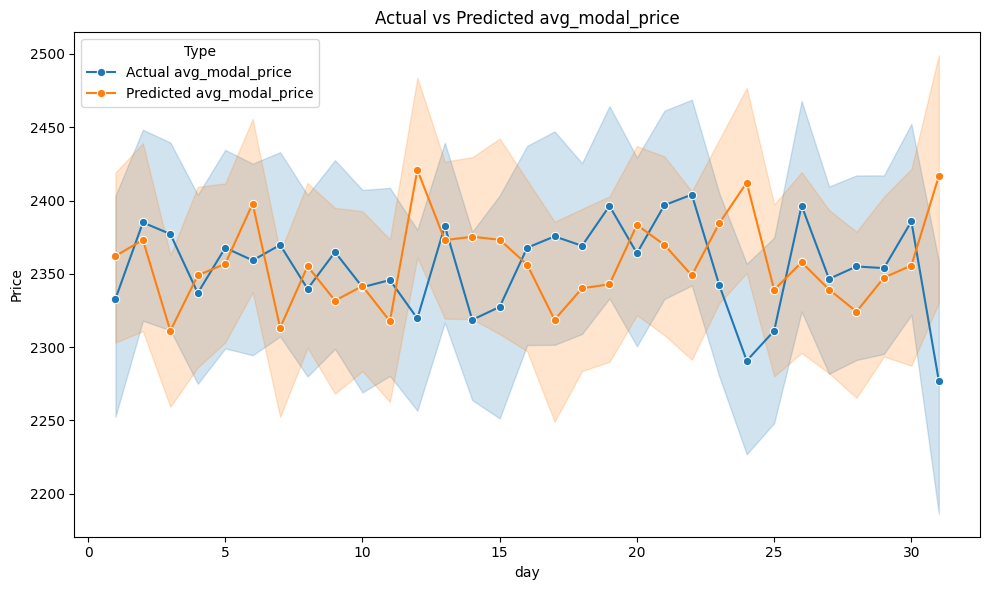

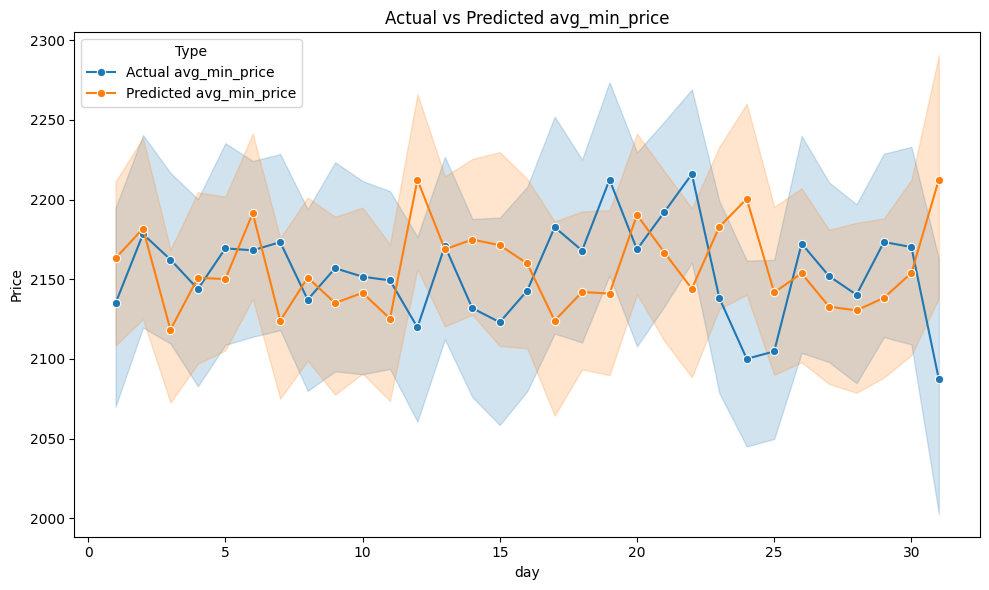

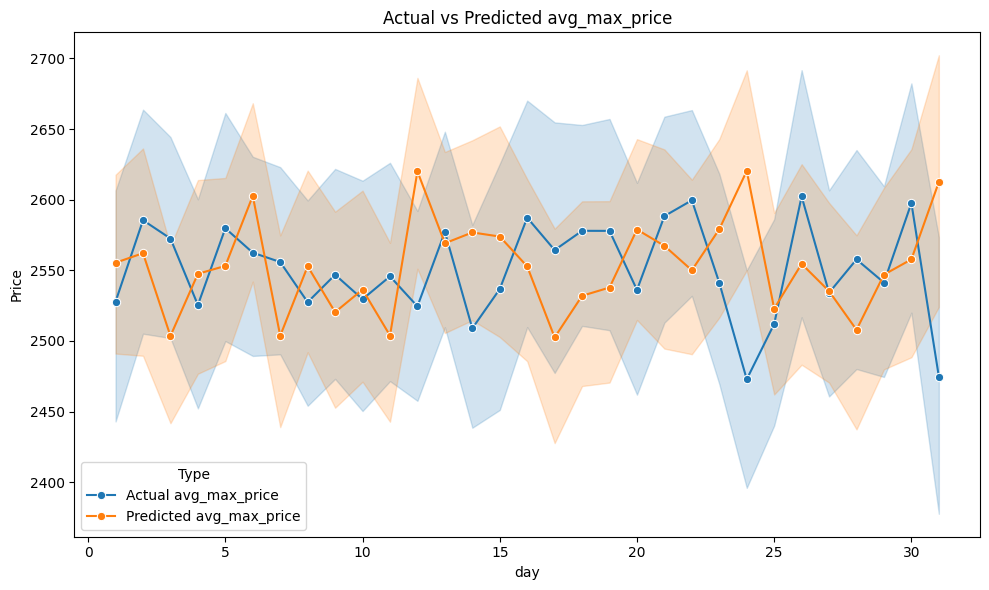

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test has a 'date' column
X_test_sorted = X_test.sort_values(by='day')
y_test_sorted = y_test.loc[X_test_sorted.index]

# Convert predictions array into a DataFrame matching y_test columns
pred_df = pd.DataFrame(
    predictions, 
    columns=['avg_modal_price', 'avg_min_price', 'avg_max_price'], 
    index=X_test_sorted.index
)

# List of target columns
price_columns = ['avg_modal_price', 'avg_min_price', 'avg_max_price']

# Loop through each column to create separate plots
for col in price_columns:
    plt.figure(figsize=(10, 6))
    
    # Prepare a DataFrame with date, actual, and predicted values
    df_plot = pd.DataFrame({
        'day': X_test_sorted['day'],
        f'Actual {col}': y_test_sorted[col],
        f'Predicted {col}': pred_df[col]
    })
    
    # Melt the DataFrame for easier plotting with seaborn
    df_melted = df_plot.melt(id_vars='day', var_name='Type', value_name='Price')
    
    # Plot with different color schemes and markers
    sns.lineplot(data=df_melted, x='day', y='Price', hue='Type', marker='o')
    
    plt.title(f'Actual vs Predicted {col}')
    plt.xlabel('day')
    plt.ylabel('Price')
    plt.legend(title='Type')
    plt.tight_layout()
    plt.show()


save_model

In [28]:
import pickle

# Save the best_model to a file
with open('wheat_model_proto.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as wheat_model_proto.pkl")


Model saved as wheat_model_proto.pkl


Streamlit app

In [30]:
import streamlit as st
import numpy as np
import pandas as pd
# Uncomment the next two lines if loading the model from a pickle file:
import pickle
best_model = pickle.load(open('wheat_model_proto.pkl', 'rb'))

# If the model is already defined in this context:
# from your_model_module import best_model

st.title("Price Prediction App")

st.write("Enter the following details to predict prices:")

# Input widgets
month = st.number_input("Month", min_value=1, max_value=12, value=1)
year = st.number_input("Year", min_value=2000, max_value=2100, value=2020)
day = st.number_input("Day", min_value=1, max_value=31, value=1)
district_name_enc = st.number_input("District Encoding", value=0)
commodity_name_enc = st.number_input("Commodity Encoding", value=0)
state_name_enc = st.number_input("State Encoding", value=0)

if st.button("Predict"):
    # Create input as a 2D array (model expects multiple samples)
    input_data = np.array([[month, year, day, district_name_enc, commodity_name_enc, state_name_enc]])
    
    # Make prediction using the trained model
    predictions = best_model.predict(input_data)
    
    # Extract predicted values for each target
    pred_modal, pred_min, pred_max = predictions[0]
    
    st.subheader("Predicted Prices")
    st.write(f"**Average Modal Price:** {pred_modal:.2f}")
    st.write(f"**Average Min Price:** {pred_min:.2f}")
    st.write(f"**Average Max Price:** {pred_max:.2f}")


2025-04-02 22:57:32.345 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 22:57:32.524 
  command:

    streamlit run C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-02 22:57:32.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 22:57:32.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 22:57:32.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 22:57:32.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 22:57:32.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 22:57:32.528 Thre